matrix array size: (20, 7)

First few rows of daily returns in decimals:

Covariance Matrix in decimals:
              Tesla   Netflix    Amazon      Meta     Cisco     Apple  \
Tesla      0.000802 -0.000118 -0.000002  0.000068 -0.000112  0.000140   
Netflix   -0.000118  0.000226  0.000118  0.000040  0.000029  0.000019   
Amazon    -0.000002  0.000118  0.000169  0.000091  0.000012  0.000035   
Meta       0.000068  0.000040  0.000091  0.000113  0.000006 -0.000011   
Cisco     -0.000112  0.000029  0.000012  0.000006  0.000064 -0.000035   
Apple      0.000140  0.000019  0.000035 -0.000011 -0.000035  0.000163   
Microsoft  0.000013  0.000066  0.000048  0.000013  0.000007  0.000036   

           Microsoft  
Tesla       0.000013  
Netflix     0.000066  
Amazon      0.000048  
Meta        0.000013  
Cisco       0.000007  
Apple       0.000036  
Microsoft   0.000093  

Correlation Matrix:
            Tesla  Netflix  Amazon    Meta   Cisco   Apple  Microsoft
Tesla      1.0000  -0.2774 -0.0051 

/tmp/ipython-input-1067473824.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_raw = pd.read_csv(INFILE, index_col=0, parse_dates=True)


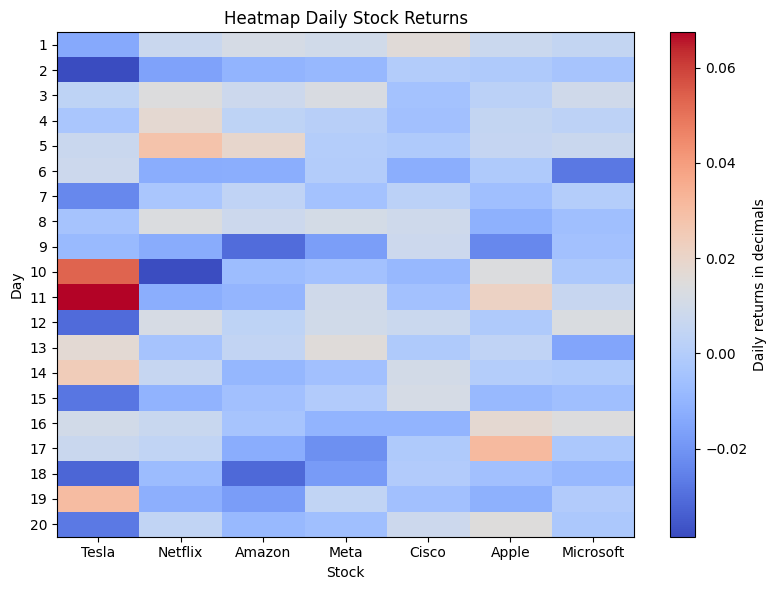

In [ ]:
# Denis Tran

import pandas as pd  #import data loading and dataframe handling
import numpy as np   #import library for lin alg and matrix op
import matplotlib.pyplot as plt #import matplotlib for plotting heatmaps
from pathlib import Path #allows to creat file paths

#creates a path object to csv file
INFILE = Path("/content/Daily Stock Returns.csv")

#reads CSV file and sets index_col=0 if true
df_raw = pd.read_csv(INFILE, index_col=0, parse_dates=True)

def percent_to_decimal(col): #removes any % and turn to decimals
    return col.str.rstrip('%').astype(float) / 100.0 #convert string to float

#returns conversed function in dataframe then prints
returns = df_raw.apply(percent_to_decimal)
print("matrix array size:", returns.shape)
print("\nFirst few rows of daily returns in decimals:")

R = returns.values #converts dataframe to matrix form
n, m = R.shape #extracts numbers of rows and columns

mean_vec = R.mean(axis=0, keepdims=True) #computes mean of each column


X = R - mean_vec #mean center the matrix by subtracting each columns mean

cov_matrix = (X.T @ X) / (n - 1) #manual covariance formula

#coverts and comput the covariance matrix into dataframe
cov = pd.DataFrame(cov_matrix, index=returns.columns, columns=returns.columns)

#prints covariance matrix
print("\nCovariance Matrix in decimals:")
print(cov.round(6))

#finds standard deviation
std_vec = np.zeros(m)
for i in range(m):
    std_vec[i] = cov_matrix[i, i] ** 0.5  #manual square root

#multiplies each std by every other std to build new matrix
std_outer = np.diag(1 / std_vec)


corr_matrix = std_outer @ cov_matrix @ std_outer
#converts correlation matrix into a DataFrame then prints it
corr = pd.DataFrame(corr_matrix, index=returns.columns,
                    columns=returns.columns)
print("\nCorrelation Matrix:")
print(corr.round(4))

#computes mean and standard deviation of daily return for each stock in %
summary = pd.DataFrame({
    "mean_%": (returns.mean() * 100).round(4),
    "std_%":  (returns.std(ddof=1) * 100).round(4)
})
#prints mean and standard deviation of daily return for each stock in %
print("\nDaily mean and standard deviation in percentages:")
print(summary)

weights = np.ones(m) / m #creates equal weights for all m stocks

#computes daily return using matrix multiplication
portfolio_daily = R @ weights
portfolio_mean = portfolio_daily.mean() #computes average daily return
portfolio_std = portfolio_daily.std(ddof=1) # computes std for daily portfolio

#prints each daily return portfolio that's been established
print("\n Daily equal-weight portfolio performance:")
print(f"Mean return: {portfolio_mean * 100:.4f}%")
print(f"Standard deviation: {portfolio_std * 100:.4f}%")

#creates heatmap of the data matrix
plt.figure(figsize=(8, 6))
#displays the 20×7 data matrix as a heatmap
plt.imshow(returns.values, aspect='auto', cmap='coolwarm')
# adds a colorbar showing the meaning of colors
plt.colorbar(label="Daily returns in decimals")
#sets x-axis to stock names
plt.xticks(ticks=np.arange(m), labels=returns.columns)
#sets y-axis to day numbers 1–20
plt.yticks(ticks=np.arange(n), labels=np.arange(1, n + 1))
plt.xlabel("Stock")#x-axis name
plt.ylabel("Day")#y-axis name
plt.title("Heatmap Daily Stock Returns")#graph title
plt.tight_layout()
plt.show() #shows heatmap


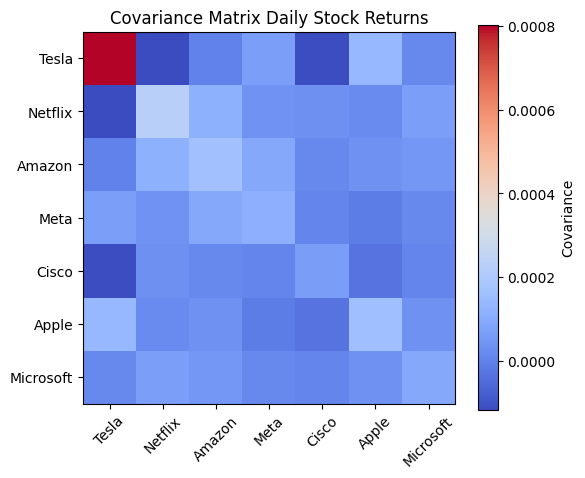

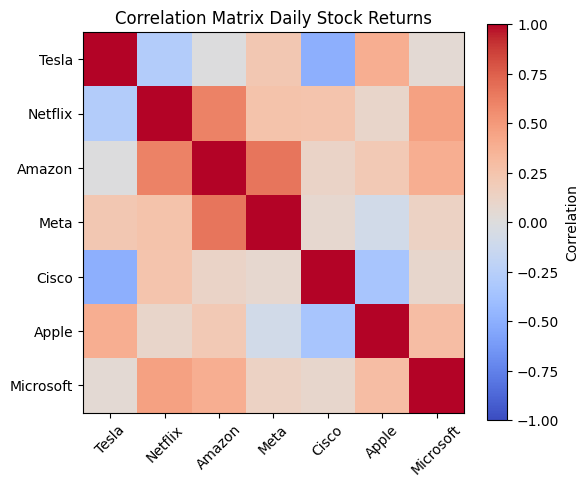

In [ ]:
plt.figure(figsize=(6, 5)) # creates figure for covariance heatmap
#displays cov matrix as heatmap
plt.imshow(cov.values, cmap='coolwarm')
plt.colorbar(label="Covariance") #add meaningful color for cov heatmap
#sets x-axis to stock names
plt.xticks(ticks=np.arange(m), labels=returns.columns, rotation=45)
#sets y-axis to day numbers 1–20
plt.yticks(ticks=np.arange(m), labels=returns.columns)
plt.title("Covariance Matrix Daily Stock Returns")#graph title
plt.show()#shows heatmap

plt.figure(figsize=(6, 5))#creates figure for correlation heatmap
#displays corr matrix as heatmap
plt.imshow(corr.values, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(label="Correlation")#add meaningful color for corr heatmap
#sets x-axis to stock names
plt.xticks(ticks=np.arange(m), labels=returns.columns, rotation=45)
#sets y-axis to day numbers 1–20
plt.yticks(ticks=np.arange(m), labels=returns.columns)
plt.title("Correlation Matrix Daily Stock Returns")#graph title
plt.tight_layout()
plt.show()#shows heatmap

PROJECT 2 PCA

Shape of mean centered data X: (20, 7)
Shape of covariance matrix: (7, 7)

Unsorted eigenvalues:
[8.73499098e-04 3.81809877e-04 1.61647475e-04 8.67004895e-05
 2.42454163e-05 3.99442676e-05 6.05844810e-05]

Sorted eigenvalues:
[8.73499098e-04 3.81809877e-04 1.61647475e-04 8.67004895e-05
 6.05844810e-05 3.99442676e-05 2.42454163e-05]

Shape of component score matrix: (20, 7)
First few rows of component scores for PC1 and PC2:
[[-0.01628302 -0.02063658]
 [-0.03609824  0.01958525]
 [ 0.00128206 -0.02446959]
 [-0.00567507 -0.01866404]
 [ 0.00161739 -0.03653663]
 [ 0.01002857  0.0204579 ]
 [-0.02486852  0.00040353]
 [-0.01054341 -0.01612484]
 [-0.01310616  0.03495446]
 [ 0.05950359  0.02133779]
 [ 0.07053478 -0.00322426]
 [-0.03350008 -0.01786448]
 [ 0.01757184 -0.00595905]
 [ 0.01889494 -0.00180733]
 [-0.02958796  0.01170431]
 [ 0.0113438  -0.01039569]
 [ 0.00949477  0.00161366]
 [-0.0324543   0.03138592]
 [ 0.02864171  0.01435352]
 [-0.02679668 -0.00011386]]

Percent variance explained by 

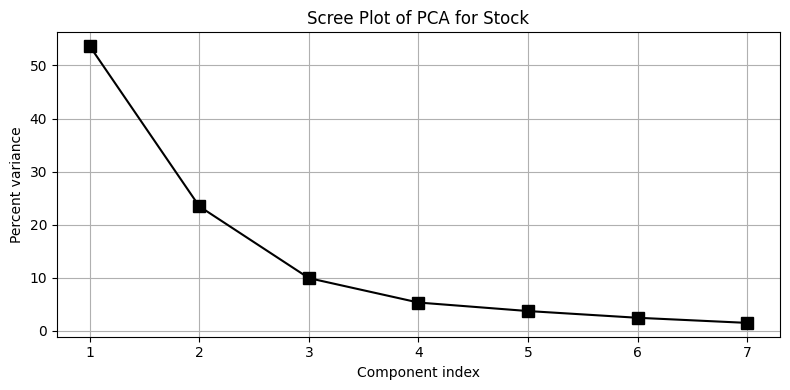

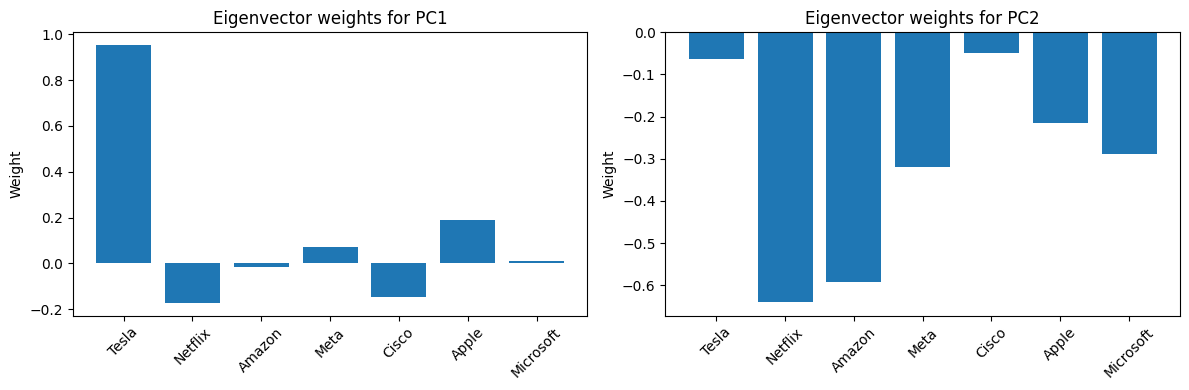

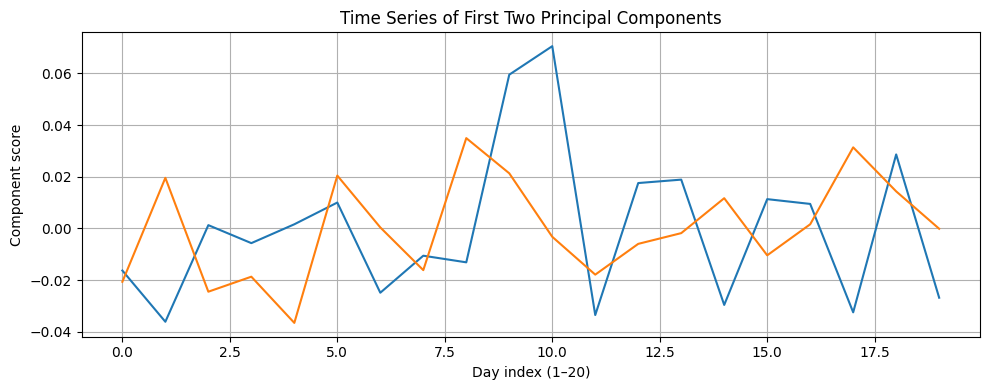


Variance of each component from score:
[8.73499098e-04 3.81809877e-04 1.61647475e-04 8.67004895e-05
 6.05844810e-05 3.99442676e-05 2.42454163e-05]

First two eigenvalues for comparison:
[0.0008735  0.00038181]


In [ ]:
#shows mean-centered data size
print("Shape of mean centered data X:", X.shape)
print("Shape of covariance matrix:", cov_matrix.shape)#show cov matrix size

#defines eigenvalues and eigenvectors of cov matrix
evals, evecs = np.linalg.eig(cov_matrix)
#keep only real eigenvalue and eigenvector numbers
evals = np.real(evals)
evecs = np.real(evecs)

#prints raw eigenvalues
print("\nUnsorted eigenvalues:")
print(evals)

sidx = np.argsort(evals)[::-1] #sort descending eigenvalues
evals = evals[sidx] #sort eigenvalues
evecs = evecs[:, sidx]   #reorders eigenvectors to match

print("\nSorted eigenvalues:") #prints assortment
print(evals)


components = X @ evecs #projects data onto principal components

#prints first 2 principal components
print("\nShape of component score matrix:", components.shape)
print("First few rows of component scores for PC1 and PC2:")
print(components[:, 0:2])

total_variance = np.sum(evals)  #computes total variance
factorScores = 100 * evals / total_variance  #computes variant percentage
#prints such
print("\nPercent variance explained by each component:")
for i in range(m):
    print(f"PC{i+1}: {factorScores[i]:.2f}%")

#creates scree plot
plt.figure(figsize=(8, 4))
# plots how much variance each principal component explains
plt.plot(range(1, m+1), factorScores, 'ks-', markersize=8)
plt.xlabel("Component index") #creates x title
plt.ylabel("Percent variance") #creates y title
plt.title("Scree Plot of PCA for Stock") #creates graph title
plt.grid(True)
plt.xticks(range(1, m+1))#sets x-axis tick marks
plt.tight_layout()#no overlapping layout
plt.show() #shows plot

stock_names = returns.columns.tolist() #store tock name as list for plot label
#creates 2 side by side subplots for PC1 AND 2 eigenvector weights
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].bar(range(m), evecs[:, 0]) #plot eigenvector weights for PC1
axs[0].set_xticks(range(m)) #sets xaxis position
axs[0].set_xticklabels(stock_names, rotation=45) #label each bar with its stock
axs[0].set_ylabel("Weight") #yaxis title for eigenvector
axs[0].set_title("Eigenvector weights for PC1") #barchart title

axs[1].bar(range(m), evecs[:, 1])  #plot eigenvector weights for PC2
axs[1].set_xticks(range(m)) #sets xaxis position
axs[1].set_xticklabels(stock_names, rotation=45) #label each bar with its stock
axs[1].set_ylabel("Weight")#yaxis title for eigenvector
axs[1].set_title("Eigenvector weights for PC2") #barchart title

plt.tight_layout()#no overlapping layout
plt.show()#shows plot

plt.figure(figsize=(10, 4))#create figure for corellation
plt.plot(components[:, 0], label="PC1") #plot PC1 scores/days
plt.plot(components[:, 1], label="PC2") #plot PC2 scores/days
plt.xlabel("Day index (1–20)") #xaxis title
plt.ylabel("Component score") #yaxis title
plt.title("Time Series of First Two Principal Components") #plot title
plt.grid(True) #add grid lines
plt.tight_layout()#no overlapping layout
plt.show() #show plot

#compute variance of PC1 & PC2 score matrix
comp_var = np.var(components, axis=0, ddof=1)
#prints comparison scores
print("\nVariance of each component from score:")
print(comp_var)
#compares component variance to eigenvalues for PCA accuracy
print("\nFirst two eigenvalues for comparison:")
print(evals[:2])
